In [20]:
#author: Amelie Bauerdick
#Wabnitz Lab

# Import Packages

In [21]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn.cluster as cluster
from sklearn.cluster import KMeans 
from sklearn.mixture import GaussianMixture
import hdbscan

# Load CSV

In [22]:
data=pd.read_csv("path/UMAP.csv")
data

,Area_M01,Area_M02,Area_M06,Area_M07,Area_MC,Aspect_Ratio_M01,Aspect_Ratio_M02,Aspect_Ratio_M06,Aspect_Ratio_M07,Length_M01,...,Shape_Ratio_M01,Area_Cytoplasm,x,y,file_name,index_file,donor,file_number,Intensity_MC_Ch02,Intensity_MC_Ch07
0,0.342516,0.164913,0.193473,0.212997,0.157543,0.935770,0.895592,0.742653,0.828787,0.160920,...,0.788925,0.207749,-4.923742,5.577067,CNR_GI_11,1,1,1,10592.503906,52029.429688
1,0.250000,0.226614,0.172203,0.194389,0.116379,0.899479,0.927894,0.797395,0.843540,0.137931,...,0.780524,0.190381,5.469038,-2.507967,CNR_GI_11,3,1,1,21277.480469,57998.902344
2,0.351871,0.227182,0.303613,0.286001,0.187716,0.916088,0.912654,0.740706,0.853506,0.160920,...,0.889737,0.408150,13.582534,8.555969,CNR_GI_11,4,1,1,56849.820312,23129.652344
3,0.357588,0.234291,0.164044,0.098769,0.146121,0.911297,0.945467,0.568358,0.966592,0.160920,...,0.889737,0.496994,12.845407,10.849370,CNR_GI_11,5,1,1,86099.359375,53895.714844
4,0.370062,0.261018,0.197844,0.153163,0.158621,0.681898,0.778701,0.983908,0.704950,0.229885,...,0.461285,0.383434,4.711984,2.185403,CNR_GI_11,6,1,1,37848.769531,66010.875000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62995,0.193347,0.176571,0.173951,0.127111,0.096767,0.914403,0.953054,0.695463,0.851317,0.103448,...,0.795034,0.215765,-7.215028,4.255849,SHE_GI_h2o2_10,17523,3,3,26087.253906,50993.730469
62996,0.270270,0.208132,0.204545,0.153736,0.129310,0.875433,0.899321,0.664939,0.770080,0.149425,...,0.810722,0.269205,-2.869954,15.365963,SHE_GI_h2o2_10,17525,3,3,9874.682617,58063.457031
62997,0.413721,0.267558,0.302448,0.284283,0.193534,0.948950,0.938887,0.811283,0.923806,0.195402,...,0.823348,0.321309,13.927344,8.297924,SHE_GI_h2o2_10,17526,3,3,29239.488281,38974.808594
62998,0.181913,0.183964,0.159382,0.101918,0.073491,0.946111,0.921682,0.770323,0.918921,0.080460,...,0.909249,0.277221,12.650148,13.765280,SHE_GI_h2o2_10,17528,3,3,8336.823242,51944.234375


In [23]:
list(data.columns)

['Area_M01',
 'Area_M02',
 'Area_M06',
 'Area_M07',
 'Area_MC',
 'Aspect_Ratio_M01',
 'Aspect_Ratio_M02',
 'Aspect_Ratio_M06',
 'Aspect_Ratio_M07',
 'Length_M01',
 'Length_M02',
 'Length_M06',
 'Length_M07',
 'Width_M01',
 'Width_M02',
 'Width_M06',
 'Width_M07',
 'Height_M01',
 'Height_M02',
 'Height_M06',
 'Height_M07',
 'Circularity_Morphology(M07__Ch07)',
 'Delta_Centroid_XY',
 'Circularity_M01',
 'Diameter_M01',
 'Perimeter_M01',
 'Symmetry_3_M01_Ch07',
 'Ratio_cell/nucleus',
 'Lobe_Count_Morphology(M07__Ch07)_Ch07',
 'Major_Axis_MC',
 'Cytoplasmic_size',
 'Similarity_MC_Ch02_Ch07',
 'Circularity_MC',
 'Major_Axis_M02',
 'Cortical_F_actin_(%)',
 'Nuclear_F_actin',
 'Shape_Ratio_M01',
 'Area_Cytoplasm',
 'x',
 'y',
 'file_name',
 'index_file',
 'donor',
 'file_number',
 'Intensity_MC_Ch02',
 'Intensity_MC_Ch07']

# Store Features Temporarily

In [24]:
index_file= data[['index_file']].copy()
names= data[['file_name']].copy()
number= data[['file_number']].copy()
donor= data[['donor']].copy()

Int2= data[['Intensity_MC_Ch02']].copy()
Int7= data[['Intensity_MC_Ch07']].copy()

In [25]:
data = data.drop(columns=[
                          'file_name',
                          'index_file',
                          'donor',
                          'file_number',
                          'Intensity_MC_Ch02',
                          'Intensity_MC_Ch07',
 ])

# K-Means

In [26]:
#elbow plot
#source: https://www.youtube.com/watch?v=iNlZ3IU5Ffw

def elbow_k_means(data, max_k):
    means = []
    inertias = []    
    for k in range(1,max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        means.append(k)
        inertias.append(kmeans.inertia_)
     
    plt.figure(figsize=(8, 3))  
    plt.plot(means, inertias, color='black',marker='o', markersize=8,linewidth=2)  
    plt.xlabel('Number of Clusters',fontsize=20)  
    plt.ylabel('Inertia', fontsize=20)  
    plt.title('Inertia Curve', fontsize=24)  
    plt.xticks(fontsize=12)  
    plt.yticks(fontsize=12)
    plt.savefig('png/elbow_dmap_UMAP', dpi=300, bbox_inches = 'tight')
    plt.show()  

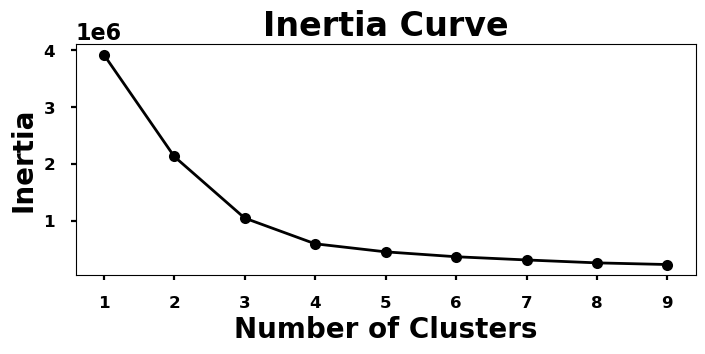

In [27]:
elbow_k_means(data, 10)

In [28]:
kmeans_labels = cluster.KMeans(n_clusters=9).fit_predict(data)

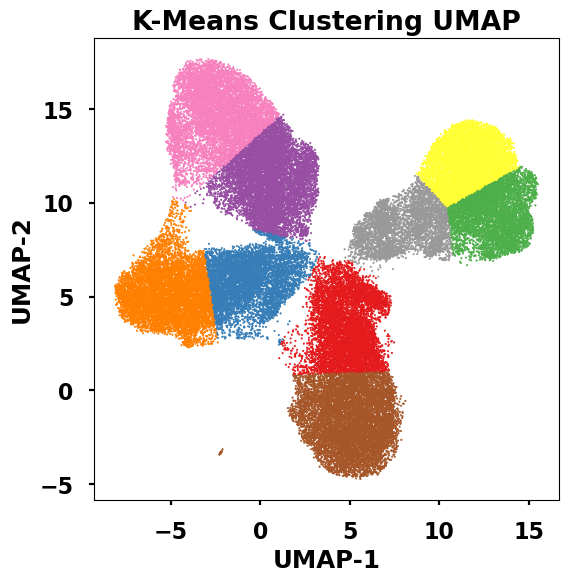

In [29]:
plt.style.use('seaborn-v0_8-poster')
plt.figure(figsize=(6, 6))

plt.scatter(data[['x']],data[['y']], c=kmeans_labels, s=1, cmap='Set1');
plt.title('K-Means Clustering UMAP')
plt.xlabel('UMAP-1')
plt.ylabel('UMAP-2')


plt.savefig('png/kmeans_UMAP', dpi=300, bbox_inches = 'tight')

In [30]:
list(data.columns)

['Area_M01',
 'Area_M02',
 'Area_M06',
 'Area_M07',
 'Area_MC',
 'Aspect_Ratio_M01',
 'Aspect_Ratio_M02',
 'Aspect_Ratio_M06',
 'Aspect_Ratio_M07',
 'Length_M01',
 'Length_M02',
 'Length_M06',
 'Length_M07',
 'Width_M01',
 'Width_M02',
 'Width_M06',
 'Width_M07',
 'Height_M01',
 'Height_M02',
 'Height_M06',
 'Height_M07',
 'Circularity_Morphology(M07__Ch07)',
 'Delta_Centroid_XY',
 'Circularity_M01',
 'Diameter_M01',
 'Perimeter_M01',
 'Symmetry_3_M01_Ch07',
 'Ratio_cell/nucleus',
 'Lobe_Count_Morphology(M07__Ch07)_Ch07',
 'Major_Axis_MC',
 'Cytoplasmic_size',
 'Similarity_MC_Ch02_Ch07',
 'Circularity_MC',
 'Major_Axis_M02',
 'Cortical_F_actin_(%)',
 'Nuclear_F_actin',
 'Shape_Ratio_M01',
 'Area_Cytoplasm',
 'x',
 'y']

# Gaussian Mixture

In [31]:
gmm = GaussianMixture(n_components=9, random_state=42)
gmm.fit(data)
gaussian_labels = gmm.predict(data)

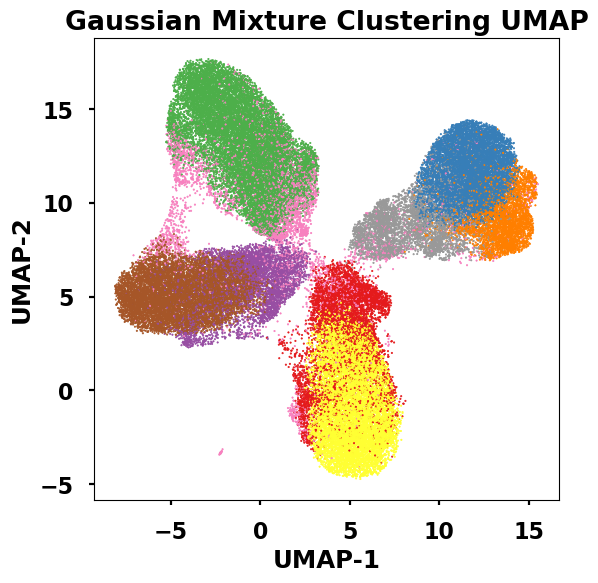

In [32]:
plt.style.use('seaborn-v0_8-poster')
plt.figure(figsize=(6, 6))

plt.scatter(data[['x']],data[['y']], c=gaussian_labels, s=1, cmap='Set1');
plt.title('Gaussian Mixture Clustering UMAP')
plt.xlabel('UMAP-1')
plt.ylabel('UMAP-2')


plt.savefig('png/gaussian_UMAP', dpi=300, bbox_inches = 'tight')

# HDBSCAN

In [33]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=300,gen_min_span_tree=True)
clusterer.fit(data)
hdbscan_labels = clusterer.labels_
outliers_mask = hdbscan_labels == -1

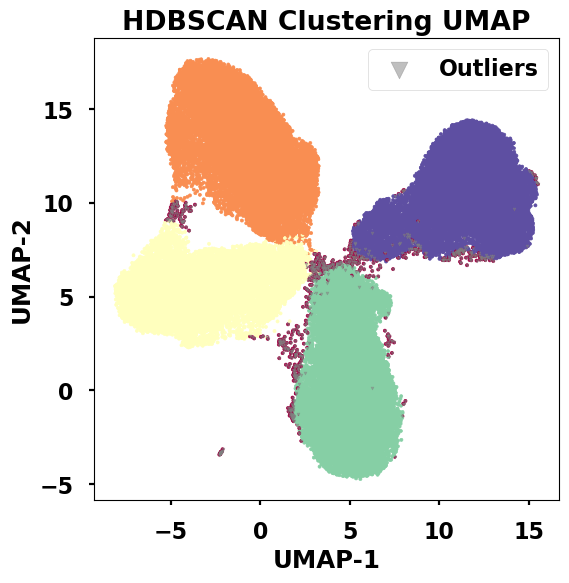

In [34]:
plt.style.use('seaborn-v0_8-poster')
plt.figure(figsize=(6, 6))

plt.scatter(data[['x']],data[['y']] , c=hdbscan_labels, cmap='Spectral', s=5)
plt.scatter(data.loc[outliers_mask, 'x'], data.loc[outliers_mask, 'y'],s=4, c='gray', marker='v', label='Outliers', alpha=0.5)
plt.title('HDBSCAN Clustering UMAP')
plt.xlabel('UMAP-1')
plt.ylabel('UMAP-2')
plt.legend(markerscale=6)

plt.savefig('png/hdbscan_UMAP', dpi=300, bbox_inches = 'tight')
plt.show()

# Save Data

In [35]:
#data['cluster'] = kmeans_labels.tolist()
data['cluster'] = gaussian_labels.tolist()
#data['cluster'] = hdbscan_labels.tolist()


In [36]:
data

,Area_M01,Area_M02,Area_M06,Area_M07,Area_MC,Aspect_Ratio_M01,Aspect_Ratio_M02,Aspect_Ratio_M06,Aspect_Ratio_M07,Length_M01,...,Similarity_MC_Ch02_Ch07,Circularity_MC,Major_Axis_M02,Cortical_F_actin_(%),Nuclear_F_actin,Shape_Ratio_M01,Area_Cytoplasm,x,y,cluster
0,0.342516,0.164913,0.193473,0.212997,0.157543,0.935770,0.895592,0.742653,0.828787,0.160920,...,0.541080,0.303220,0.266270,0.355827,0.663860,0.788925,0.207749,-4.923742,5.577067,6
1,0.250000,0.226614,0.172203,0.194389,0.116379,0.899479,0.927894,0.797395,0.843540,0.137931,...,0.444675,0.445205,0.306111,0.361942,0.651573,0.780524,0.190381,5.469038,-2.507967,5
2,0.351871,0.227182,0.303613,0.286001,0.187716,0.916088,0.912654,0.740706,0.853506,0.160920,...,0.695740,0.222265,0.308978,0.356321,0.667313,0.889737,0.408150,13.582534,8.555969,4
3,0.357588,0.234291,0.164044,0.098769,0.146121,0.911297,0.945467,0.568358,0.966592,0.160920,...,0.373304,0.476875,0.308074,0.352234,0.631308,0.889737,0.496994,12.845407,10.849370,1
4,0.370062,0.261018,0.197844,0.153163,0.158621,0.681898,0.778701,0.983908,0.704950,0.229885,...,0.476373,0.141543,0.360564,0.364883,0.643859,0.461285,0.383434,4.711984,2.185403,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62995,0.193347,0.176571,0.173951,0.127111,0.096767,0.914403,0.953054,0.695463,0.851317,0.103448,...,0.522533,0.465800,0.266514,0.364256,0.648116,0.795034,0.215765,-7.215028,4.255849,6
62996,0.270270,0.208132,0.204545,0.153736,0.129310,0.875433,0.899321,0.664939,0.770080,0.149425,...,0.576718,0.264110,0.298239,0.355157,0.653798,0.810722,0.269205,-2.869954,15.365963,2
62997,0.413721,0.267558,0.302448,0.284283,0.193534,0.948950,0.938887,0.811283,0.923806,0.195402,...,0.675180,0.583015,0.330699,0.353462,0.667523,0.823348,0.321309,13.927344,8.297924,4
62998,0.181913,0.183964,0.159382,0.101918,0.073491,0.946111,0.921682,0.770323,0.918921,0.080460,...,0.562978,0.491716,0.276475,0.361289,0.648451,0.909249,0.277221,12.650148,13.765280,1


In [37]:
frames=[data,names,index_file,donor,number,Int2,Int7]
data=pd.concat(frames, axis=1)
data

,Area_M01,Area_M02,Area_M06,Area_M07,Area_MC,Aspect_Ratio_M01,Aspect_Ratio_M02,Aspect_Ratio_M06,Aspect_Ratio_M07,Length_M01,...,Area_Cytoplasm,x,y,cluster,file_name,index_file,donor,file_number,Intensity_MC_Ch02,Intensity_MC_Ch07
0,0.342516,0.164913,0.193473,0.212997,0.157543,0.935770,0.895592,0.742653,0.828787,0.160920,...,0.207749,-4.923742,5.577067,6,CNR_GI_11,1,1,1,10592.503906,52029.429688
1,0.250000,0.226614,0.172203,0.194389,0.116379,0.899479,0.927894,0.797395,0.843540,0.137931,...,0.190381,5.469038,-2.507967,5,CNR_GI_11,3,1,1,21277.480469,57998.902344
2,0.351871,0.227182,0.303613,0.286001,0.187716,0.916088,0.912654,0.740706,0.853506,0.160920,...,0.408150,13.582534,8.555969,4,CNR_GI_11,4,1,1,56849.820312,23129.652344
3,0.357588,0.234291,0.164044,0.098769,0.146121,0.911297,0.945467,0.568358,0.966592,0.160920,...,0.496994,12.845407,10.849370,1,CNR_GI_11,5,1,1,86099.359375,53895.714844
4,0.370062,0.261018,0.197844,0.153163,0.158621,0.681898,0.778701,0.983908,0.704950,0.229885,...,0.383434,4.711984,2.185403,5,CNR_GI_11,6,1,1,37848.769531,66010.875000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62995,0.193347,0.176571,0.173951,0.127111,0.096767,0.914403,0.953054,0.695463,0.851317,0.103448,...,0.215765,-7.215028,4.255849,6,SHE_GI_h2o2_10,17523,3,3,26087.253906,50993.730469
62996,0.270270,0.208132,0.204545,0.153736,0.129310,0.875433,0.899321,0.664939,0.770080,0.149425,...,0.269205,-2.869954,15.365963,2,SHE_GI_h2o2_10,17525,3,3,9874.682617,58063.457031
62997,0.413721,0.267558,0.302448,0.284283,0.193534,0.948950,0.938887,0.811283,0.923806,0.195402,...,0.321309,13.927344,8.297924,4,SHE_GI_h2o2_10,17526,3,3,29239.488281,38974.808594
62998,0.181913,0.183964,0.159382,0.101918,0.073491,0.946111,0.921682,0.770323,0.918921,0.080460,...,0.277221,12.650148,13.765280,1,SHE_GI_h2o2_10,17528,3,3,8336.823242,51944.234375


In [38]:
data.to_csv("path/UMAP_2.csv",index=False)